In [1]:
# %matplotlib inline
import collections
import math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('pgf', texsystem='pdflatex')
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pyqtwebengine --user
# !{sys.executable} -m pip install pyqt5 --user
# pip3 install PyQt5==5.9.2

# Generowanie N próbek z rozkładu Gamma o wielkości n

In [2]:
n = 10
N = 10000
ALFA = 0.6 
WP = []
WNewE = []  
for i in range(N):
    x = stats.gamma.rvs(a=ALFA, size=n)
    WP.append(x)
WNewEK = []  

# Wyznaczenie wartości Nowego estymatora i Nowego z korektą

In [3]:
for j in range(N):
    lnX = []
    for i in range(n):
        lnX.append(math.log(WP[j][i]))
    XlnX = []
    for i in range(n):
        XlnX.append(WP[j][i]*math.log(WP[j][i]))
    S = np.sum(WP[j])
    SlnX = np.sum(lnX)
    SXlnX = np.sum(XlnX)
    NewE = (n*S)/(n*SXlnX - SlnX*S)
    WNewE.append(NewE)
    WNewEK.append((n-1)/(n+2)*NewE)

In [4]:
print("E(WNewE)=",np.mean(WNewE))
print("Std-NewE=",np.std(WNewE))
print("Var(WNewE)=",np.var(WNewE))
print("Var(WNewEK)=",(((n-1)/(n+2))**2)*np.var(WNewE))
# print("BWNewE=",np.mean(WNewE) - ALFA)
# print("BWNewEK=",np.mean(WNewEK) - ALFA)
print("RWNewE=",np.var(WNewE) + (np.mean(WNewE) - ALFA)**2)
print("RWNewEK=",np.var(WNewEK) + (np.mean(WNewEK) - ALFA)**2)

E(WNewE)= 0.8014851529551961
Std-NewE= 0.41080985866233843
Var(WNewE)= 0.16876473997417046
Var(WNewEK)= 0.09493016623547089
RWNewE= 0.20936100683554923
RWNewEK= 0.09493140693007732


# Boxplots dla NewE i NewEK

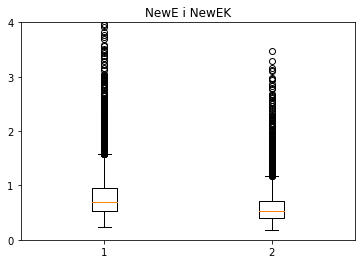

In [5]:
data = [WNewE, WNewEK]
# fig = plt.figure(figsize =(5, 4))
plt.title('NewE i NewEK')
plt.ylim(0, 4)
plt.yticks([0, 1, 2, 3, 4])
plt.boxplot(data)
plt.savefig('C:\\Users\\123\\Documents\\DDR\\Praca\\p1rys.pgf')